In [2]:
import pandas as pd
import numpy as mp
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
fmri = sns.load_dataset("fmri")
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


Text(0.5, 1.0, 'FMRI Signal Across Time')

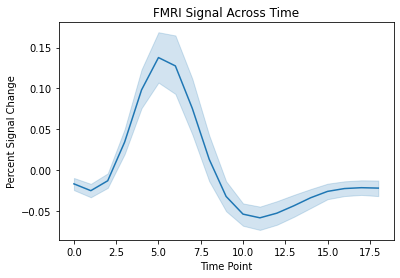

In [8]:
sns.lineplot(data=fmri, x="timepoint", y="signal")

plt.xlabel("Time Point")
plt.ylabel("Percent Signal Change")
plt.title("FMRI Signal Across Time")

<AxesSubplot:xlabel='timepoint', ylabel='signal'>

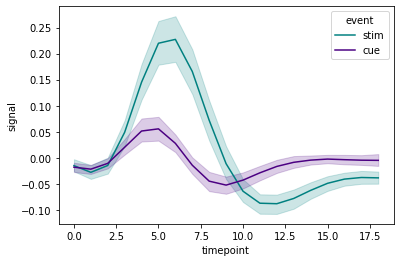

In [12]:
sns.lineplot(
    data=fmri,
    x="timepoint",
    y="signal",
    hue="event",
    palette=["teal", "indigo"]
)

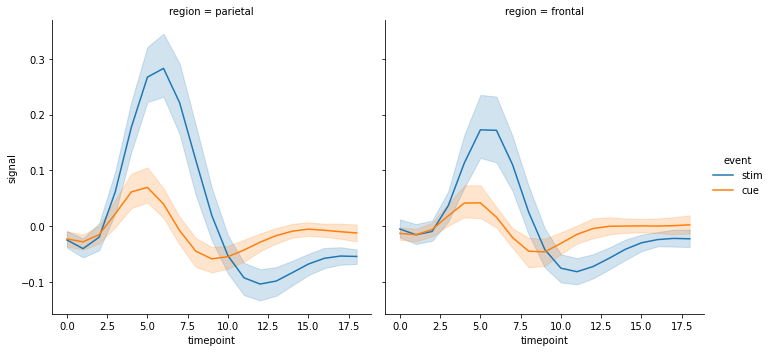

In [15]:
sns.relplot(
    data=fmri,
    x="timepoint",
    y="signal",
    hue="event",
    col="region",
    kind="line"
)

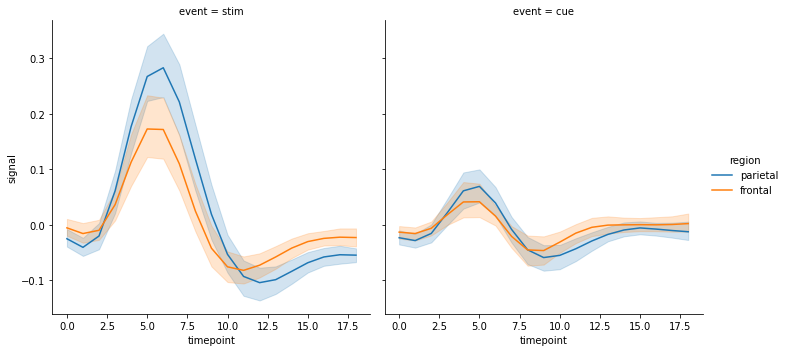

In [16]:
sns.relplot(
    data=fmri,
    x="timepoint",
    y="signal",
    hue="region",
    col="event",
    kind="line"
)

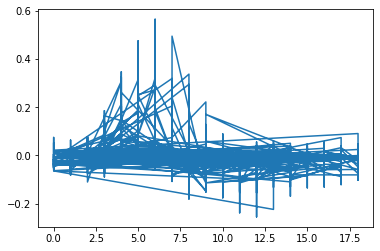

In [18]:
plt.plot(fmri['timepoint'], fmri['signal'])

In [21]:
fmri[['timepoint', 'signal']]

,timepoint,signal
0,18,-0.017552
1,14,-0.080883
2,18,-0.081033
3,18,-0.046134
4,18,-0.037970
...,...,...
1059,8,0.018165
1060,7,-0.029130
1061,7,-0.004939
1062,7,-0.025367


In [24]:
data = fmri[['timepoint', 'signal']].groupby('timepoint').mean()
data.head()

,signal
timepoint,
0,-0.016662
1,-0.025002
2,-0.012873
3,0.034446
4,0.098194


Text(0, 0.5, '% Signal Change')

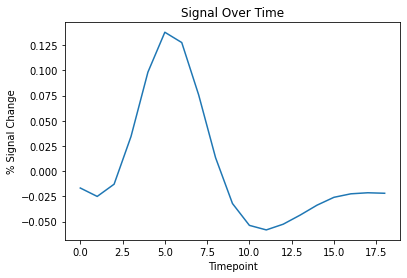

In [26]:
plt.plot(data)
plt.title("Signal Over Time")
plt.xlabel("Timepoint")
plt.ylabel("% Signal Change")

In [27]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [35]:
mean_day = tips[['total_bill', 'day']].groupby('day').mean()
mean_day

,total_bill
day,
Thur,17.682742
Fri,17.151579
Sat,20.441379
Sun,21.410000


<BarContainer object of 4 artists>

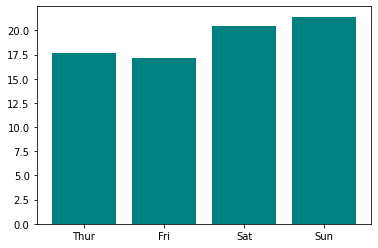

In [43]:
plt.bar(mean_day.index, mean_day['total_bill'], color="teal")

In [30]:
tips.groupby('day').mean()

,total_bill,tip,size
day,,,
Thur,17.682742,2.771452,2.451613
Fri,17.151579,2.734737,2.105263
Sat,20.441379,2.993103,2.517241
Sun,21.410000,3.255132,2.842105


In [48]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


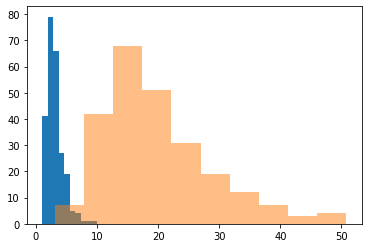

In [49]:
plt.hist(tips['tip'])
plt.hist(tips['total_bill'], alpha=0.5)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

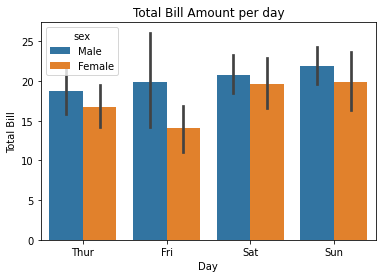

In [57]:
sns.barplot(data=tips, x="day", y="total_bill", hue="sex")
plt.xlabel("Day")
plt.ylabel("Total Bill")
plt.title("Total Bill Amount per day")
plt.show

<AxesSubplot:xlabel='total_bill', ylabel='day'>

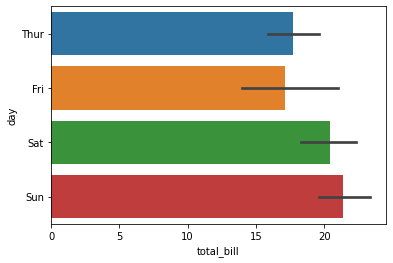

In [54]:
sns.barplot(data=tips, x="total_bill", y="day")

In [60]:
tips['tip_pc'] = tips['tip'] / tips['total_bill']

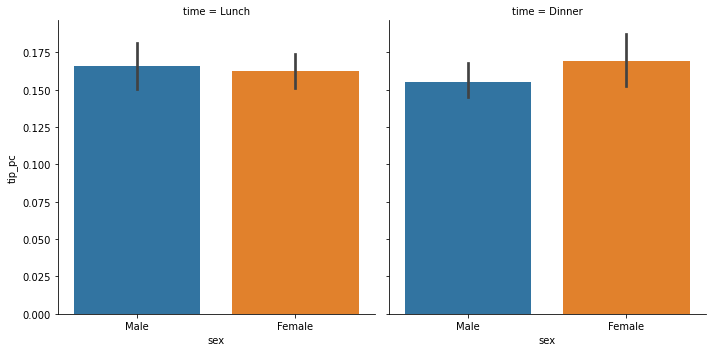

In [61]:
sns.catplot(
    data=tips,
    x="sex",
    y="tip_pc",
    col="time",
    kind="bar"
)

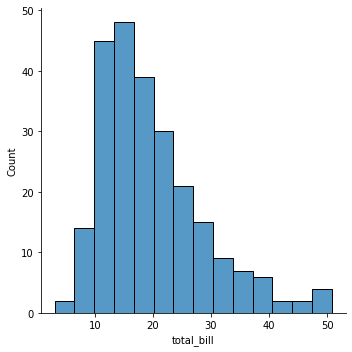

In [63]:
sns.displot(tips['total_bill'])

<AxesSubplot:xlabel='total_bill', ylabel='Count'>

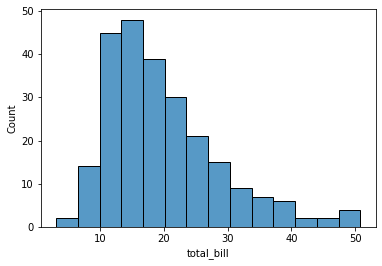

In [64]:
sns.histplot(tips['total_bill'])

In [66]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Text(0, 0.5, 'Petal Width')

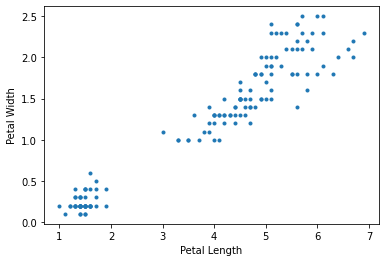

In [69]:
plt.scatter(iris['petal_length'], iris['petal_width'], marker='.')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

Text(0.5, 1.0, 'For Differenct Species of Iris')

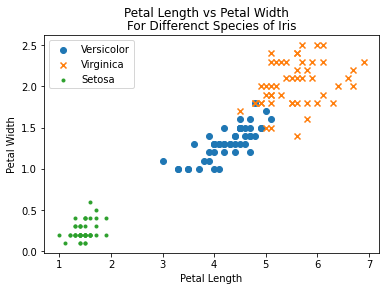

In [79]:
vers = iris[iris['species'] == 'versicolor']
virg = iris[iris['species'] == 'virginica']
seto = iris[iris['species'] == 'setosa']

plt.scatter(vers.petal_length, vers.petal_width, marker='o')
plt.scatter(virg.petal_length, virg.petal_width, marker='x')
plt.scatter(seto.petal_length, seto.petal_width, marker='.')

plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend(labels=["Versicolor", "Virginica", "Setosa"])
plt.suptitle("Petal Length vs Petal Width")
plt.title( "For Differenct Species of Iris")

In [82]:
iris.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

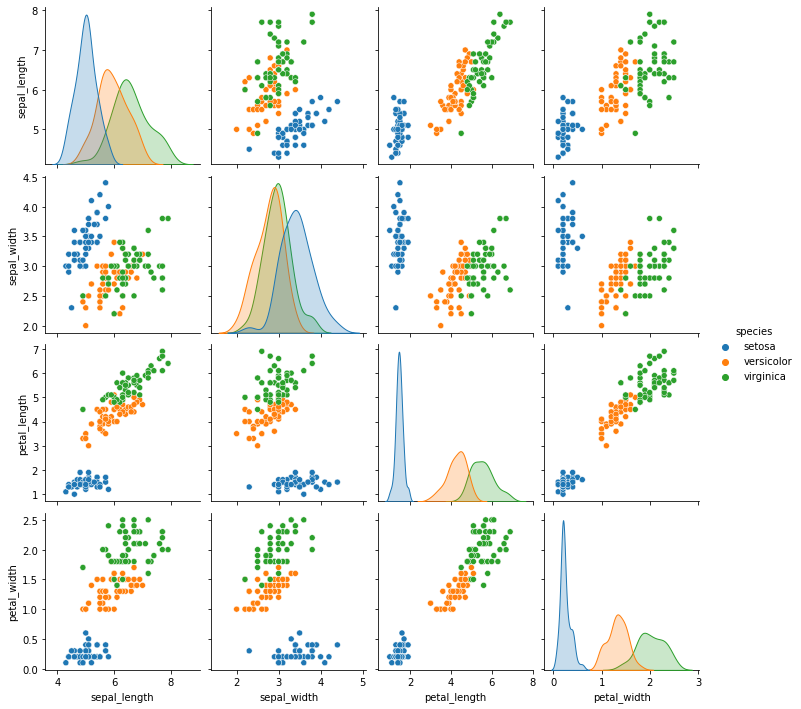

In [81]:
sns.pairplot(iris, hue='species')

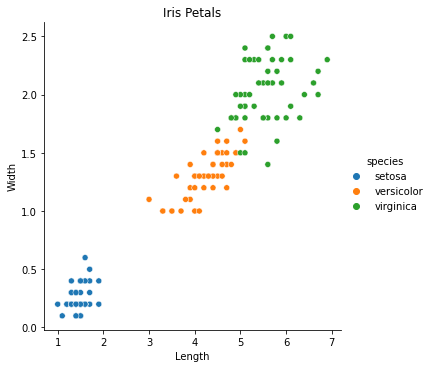

In [84]:
sns.relplot(
    data=iris,
    x="petal_length",
    y="petal_width",
    hue="species"
).set(
    title="Iris Petals",
    xlabel="Length",
    ylabel="Width"
)

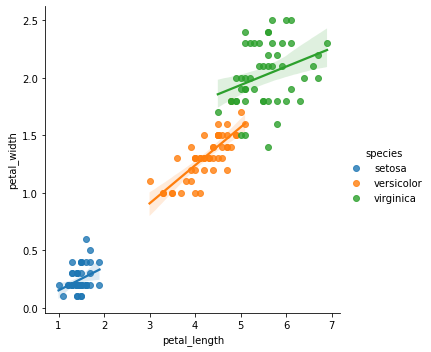

In [86]:
sns.lmplot(data=iris, x='petal_length', y='petal_width', hue='species')

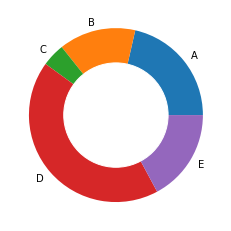

In [90]:
counts = [15, 10, 3, 30, 12]
plt.pie(counts, labels=['A', 'B', 'C', 'D', 'E'])
circle = plt.Circle((0, 0), 0.6, color='white')
fig = plt.gcf()
fig.gca().add_artist(circle)

In [91]:
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [93]:
boarded = titanic.groupby('class').pclass.count()
boarded

class
First     216
Second    184
Third     491
Name: pclass, dtype: int64

In [94]:
import squarify

(0.0, 100.0, 0.0, 100.0)

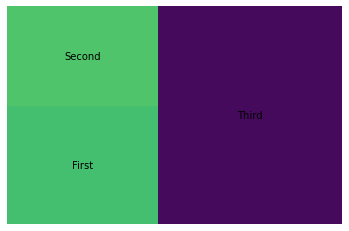

In [104]:
c= ["xkcd:blue", "xkcd:pink", "xkcd:teal"]
squarify.plot(boarded, label=boarded.index)
plt.axis('off')

<AxesSubplot:>

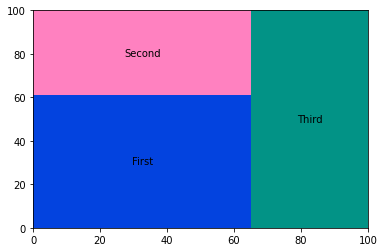

In [107]:
survived = titanic[titanic['alive'] == 'yes'].groupby('class').pclass.count()
squarify.plot(survived, label=survived.index, color=c)